<a href="https://colab.research.google.com/github/kamula/Diabetes-Prediction/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Pima Indian Diabetes data, predict with 70% or greater accuracy which people are likely to develop diabetes

In [0]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
%matplotlib inline

In [2]:
upload = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
df = pd.read_csv(io.StringIO(upload['diabetes.csv'].decode('utf-8')))

In [7]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#check for null values
df.isnull().values.any()

False

In [0]:
#correlation matrix for each pair
def co_relation(df,size=11):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=50)
    plt.yticks(range(len(corr.columns)),corr.columns)

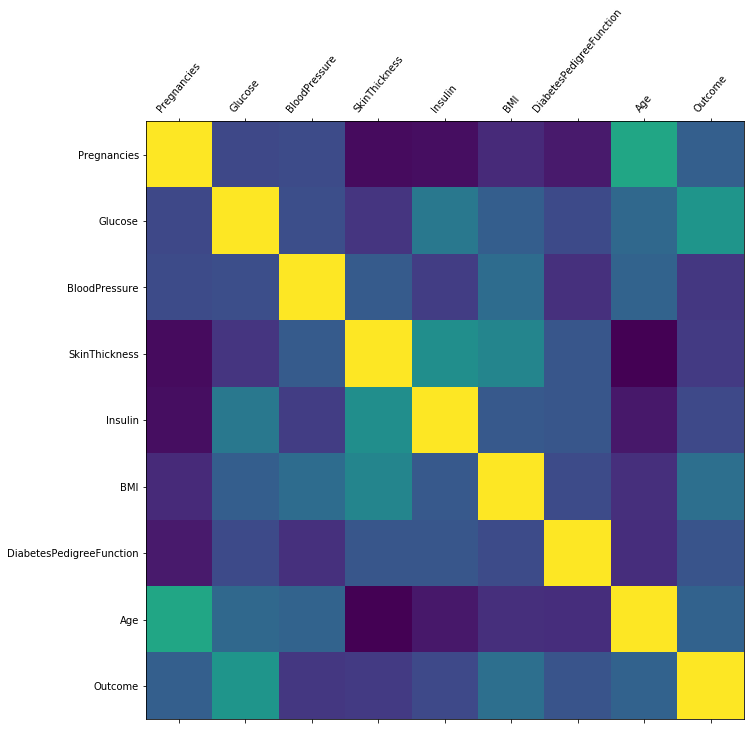

In [10]:
co_relation(df)

Check Diabetes ratio

In [11]:
num_true = len(df.loc[df['Outcome']==True])
num_false = len(df.loc[df['Outcome']==False])
print("True cases: {0} ({1:2.2f}%)".format(num_true,(num_true/(num_true+num_false))*100))
print("False cases: {0} ({1:2.2f}%)".format(num_false,(num_false/(num_true+num_false))*100))

True cases: 268 (34.90%)
False cases: 500 (65.10%)


In [12]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**TRAINING THE MODEL**

In [0]:
from sklearn.model_selection import train_test_split
feature_col_names =['Pregnancies','Glucose','BloodPressure',
                    'SkinThickness','Insulin','BMI',
                    'DiabetesPedigreeFunction','Age']
#Outcome == Diabetes
#1= True
#0= False
predicted_class_name =['Outcome']
x = df[feature_col_names].values
y = df[predicted_class_name].values
split_test_size = 0.30
X_train,X_test, Y_train, Y_test = train_test_split(x,y, test_size = split_test_size, random_state=42)

CONFIRM DATA IS SPLIT CORRECTLY 70% 30%

In [16]:
print("Training data: ({0:0.2f}%)".format((len(X_train)/len(df.index))*100))
print("Test data: ({0:0.2f}%)".format((len(X_test)/len(df.index))*100))

Training data: (69.92%)
Test data: (30.08%)


In [19]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 1]), (len(df.loc[df['Outcome'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 0]), (len(df.loc[df['Outcome'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [20]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


replace 0 with mean

In [0]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

training model

In [23]:
from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()

nb_model.fit(X_train, Y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

perfomance after training

In [25]:
nb_predict_train = nb_model.predict(X_train)


from sklearn import metrics

# printing accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, nb_predict_train)))
print()

Accuracy: 0.7542

